Author: Pudhuyugan

Roll No: 18IM30017

Optimization of Bank lending decision using Simulated annealing

In [1]:
import numpy as np
import math as mt

In [2]:
# defining the fitness function

def fitnessvalue(rl,l,lamda,K,D,ch):
    a=np.sum(ch*rl*lamda)-np.sum(ch*lamda)
    b=np.sum(((1-K)*D-l)*ch*0.01)
    c=0.009*D
    d=np.sum(ch*lamda)
    fit=a+b-c-d
    return fit

In [3]:
# initializing the variables 
D=60
K=0.15
l=np.array([10,25,4,11,18,3,17,15,9,10])
rl=np.array([0.021,0.022,0.021,0.027,0.025,0.026,0.023,0.021,0.028,0.022])
lamda=np.array([0.0002,0.0058,0.0001,0.0003,0.0024,0.0002,0.0058,0.0002,0.001,0.001])
n_k=10

In [4]:
# Calculating the initial temperature
fito=[];
for i in range(5):
    x=np.random.randint(2,size=10)
    fito.append(fitnessvalue(rl,l,lamda,K,D,x))  
T=sum(fito)/5

In [5]:
ch=np.random.randint(2,size=10)
f=[];
while T>0:
    for i in range(n_k):               # generating neighbourhood solutions by swapping adj indices
            a=np.random.randint(0,9)
            if a==9:
                   b=8
            else:
                    b=a+1
            ch_1=ch.copy()   
            temp=ch_1[a]
            ch_1[a]=ch_1[b]
            ch_1[b]=temp
            if fitnessvalue(rl,l,lamda,K,D,ch_1)>fitnessvalue(rl,l,lamda,K,D,ch): # accepting if fitness improves
                    ch=ch_1;
            elif mt.exp((fitnessvalue(rl,l,lamda,K,D,ch_1)-fitnessvalue(rl,l,lamda,K,D,ch))/T)<np.random.rand(): # accepting with a probability if fitness decreases
                    ch=ch_1;
    f.append(fitnessvalue(rl,l,lamda,K,D,ch))                
    T=T-0.002;                

In [6]:
print(max(f)) # maximum fitness achieved as of now
b=len(f)
print(b) # no of iterations carried out

2.4040738
590


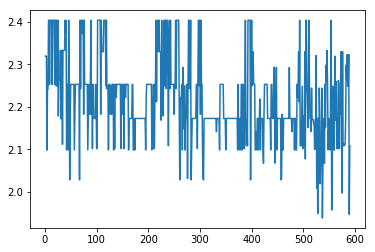

In [7]:
# plot of how fitness changes with each iteration
n_iter=list(range(1,b+1))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.array(n_iter),np.array(f))